In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import operator
import string
from sklearn.linear_model import LinearRegression
from collections import defaultdict
from nltk.corpus import wordnet
from nltk.tokenize import regexp_tokenize

In [2]:
tweet_df=pd.read_csv("tweets-dataset.csv", encoding='utf-8')
tweet_df.head()

,Sentence
0,"@BubblyDentist @MeetUunngLee nahi nahi, mere s..."
1,going to the grammys first entertainment law b...
2,bohot hi badiya ji aap sunao?
3,Parvez Musharraf is Digvijay Singh of Pakistan...
4,guddu ko bass john cena k sticker ki padii hai...


## Data Preprocessing

Few of the data-preprocessing step are
 - Encoding the text to ascii and again decoding as ascii which removes all the non-ascii strings like emojis.
 - Removing all the links (starting with http and pic)
 - Removing all the string emojis (like- :/)
 - Removing all the string starting with @ (mentions)
 - Removing all the # tag words.
 - Removing all the punctations.

In [3]:
#converting into single string
full_text=""
for i in range(tweet_df.shape[0]):
    full_text=full_text + tweet_df['Sentence'][i] + ' '
    

In [5]:
result=full_text.encode('ascii', 'ignore').decode('ascii')
result = re.sub("(http|pic.)\S+(\xa0)*", "", result)
result=re.sub('(:|;|<)[-\]*[a-zA-Z0-9(){}]',"", result)
result=re.sub("@\S+", "", result)
result = re.sub("#\S+","", result)
result= "".join([char for char in result if char not in string.punctuation])
result=re.sub(r"(\.)*", "",result)
result=re.sub(r"\n","",result)


## Tokenization and TTR Calculation

$$TTR = \frac{\text{Total Types}}{\text{Type Total Tokens}}$$

In [6]:
"""
Getting total tokens and total different types of tokens -- using regexp tokenizer which will only take words into account
ignore numerical characters.

"""

word_tokens = regexp_tokenize(result, pattern="[a-zA-Z']+")
         
word_types = set(word_tokens)

TTR = len(word_types)/len(word_tokens) 
print("No. of Tokens:", len(word_tokens))
print("No. of Types:", len(word_types))
print("TTR:", TTR)

No. of Tokens: 283265
No. of Types: 38559
TTR: 0.13612341800081196


## Zipf's Law

- Word Frequency is inversely proportional to its length.
$$ l \propto \frac{1}{f}$$
- Meaning of a word is directly proportional to square root of its frequency.
$$ m \propto \sqrt f$$

Note - to get the total number of meaning i have used wordnet by nltk.

In [7]:
# Dictionary of frequencies of tokens

freq_count = defaultdict(int)
for i in word_tokens:
    freq_count[i] += 1

# Dictionary of length of tokens 

len_count = defaultdict(int)
for i in freq_count.keys():
    len_count[i]=len(i)


Text(0.5, 1.0, 'Plot of Frequency vs length')

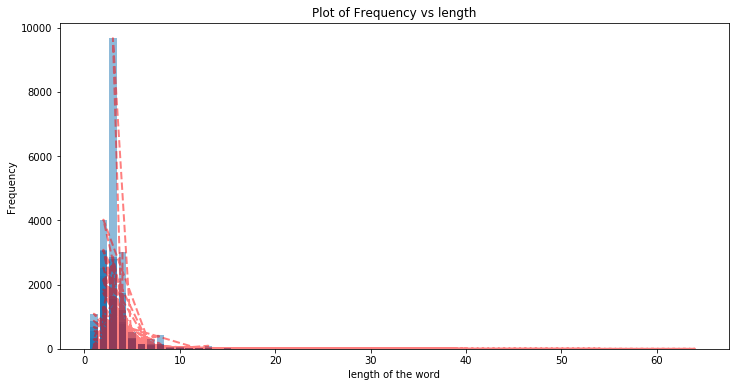

In [9]:
plt.show()
plt.figure(figsize=(12,6))
s = 1
plt.bar(list(len_count.values()),list(freq_count.values()),align='center', alpha=0.5)
plt.plot(list(len_count.values()), list(freq_count.values()) ,color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.xlabel('length of the word')
plt.title('Plot of Frequency vs length')

In [44]:
"""
good        184        27
love        176        20
match       169        19
know        150        12
about       136         8
wait        122         6
happy       86          4
best        172         43
one         194         9

"""

sorted_x = sorted(freq_count.items(), key=operator.itemgetter(1), reverse=True)
print(len(wordnet.synsets("one")))




9


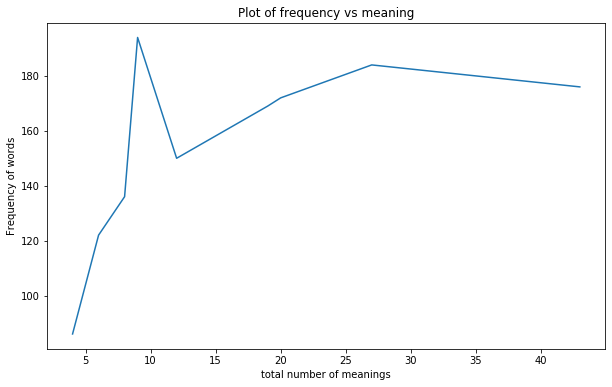

In [42]:
meaning_count=[4,6,8,9,12,19,20,27,43]
f_count=[86,122,136,194,150,169,172,184,176]
plt.figure(figsize=(10,6))
plt.plot(meaning_count,f_count)
plt.ylabel('Frequency of words')
plt.xlabel('total number of meanings')
plt.title('Plot of frequency vs meaning')
plt.show()

## Heap's Law

Let |V| be the size of the vocabulary and N be the corresponding number of tokens.
$$|V|=KN^{\beta}$$

In [10]:
corpus=[]
vocab=[]
curr_vocab=set()
for i in range(len(word_tokens)):
    corpus.append(i+1)
    curr_vocab.add(word_tokens[i])
    vocab.append(len(curr_vocab))
    

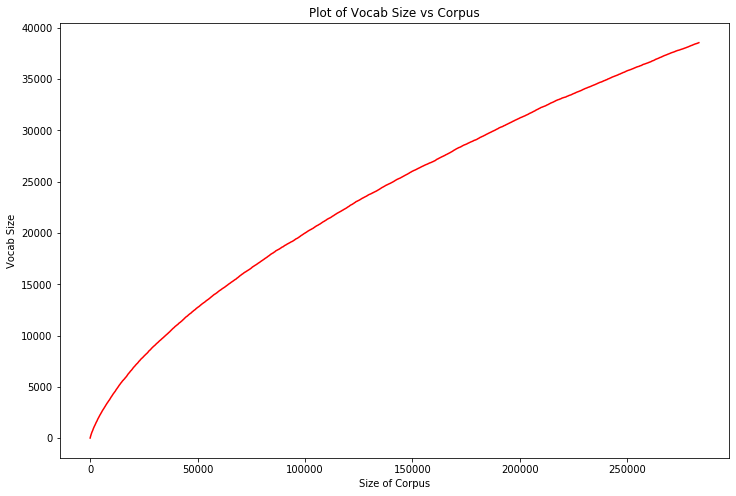

In [15]:
plt.figure(figsize=(12,8))
plt.plot(corpus,vocab, color='r')
plt.ylabel('Vocab Size')
plt.xlabel('Size of Corpus')
plt.title('Plot of Vocab Size vs Corpus')
plt.show()

In [16]:
#Finding K and Beta

reg_y=np.log(vocab)
reg_y=reg_y.reshape(reg_y.shape[0],1)
reg_x=np.log(corpus)
reg_x=reg_x.reshape(reg_x.shape[0],1)

reg = LinearRegression().fit(reg_x, reg_y)

print("Value of Beta - ",reg.coef_[0][0])
print("Value of K - ", np.exp(reg.intercept_)[0])

Value of Beta -  0.685989871758542
Value of K -  7.306084257611552


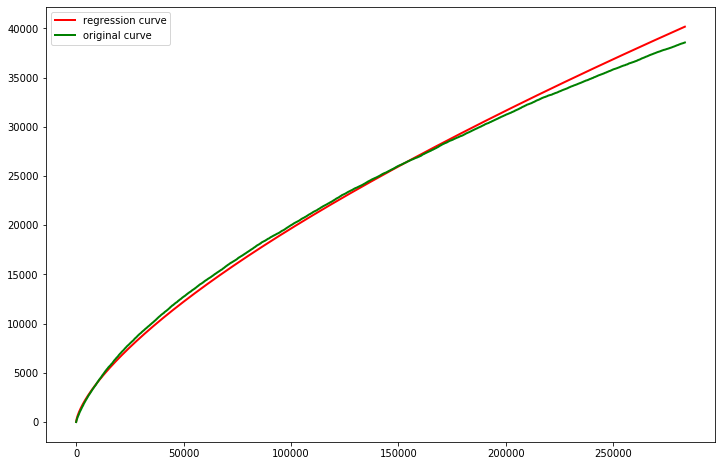

In [19]:
curve_data=np.array(corpus)
curve_plot=(np.exp(reg.intercept_)[0])*np.power(curve_data,reg.coef_[0][0])
plt.figure(figsize=(12,8))
plt.plot(curve_data,curve_plot,color="red",linewidth=2, label='regression curve')
plt.plot(corpus,vocab,color='g',linewidth=2 ,label='original curve')
plt.legend(loc='upper left')
plt.show()